<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Recopilando-datos..." data-toc-modified-id="Recopilando-datos...-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Recopilando datos...</a></span></li><li><span><a href="#Función-para-limpiar-cualquier-dataframe-con-la-misma-estructura-que-el-nuestro" data-toc-modified-id="Función-para-limpiar-cualquier-dataframe-con-la-misma-estructura-que-el-nuestro-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Función para limpiar cualquier dataframe con la misma estructura que el nuestro</a></span></li><li><span><a href="#Aplicamos-la-función-a-todos-los-Dataframes-y-los-juntamos-en-uno" data-toc-modified-id="Aplicamos-la-función-a-todos-los-Dataframes-y-los-juntamos-en-uno-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Aplicamos la función a todos los Dataframes y los juntamos en uno</a></span><ul class="toc-item"><li><span><a href="#Limpiamos-nombres-de-Universidad" data-toc-modified-id="Limpiamos-nombres-de-Universidad-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Limpiamos nombres de Universidad</a></span></li><li><span><a href="#Limpiamos-columna-Dedicación" data-toc-modified-id="Limpiamos-columna-Dedicación-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Limpiamos columna Dedicación</a></span></li></ul></li><li><span><a href="#Guardamos-nuestro-Frankenstein-en-.csv" data-toc-modified-id="Guardamos-nuestro-Frankenstein-en-.csv-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Guardamos nuestro Frankenstein en <code>.csv</code></a></span></li></ul></div>

In [1]:
import pandas as pd #manejar dataframes(datos en formato tabular)
import numpy as np #manejo de variables
import os #nos permite navegar por nuestras carpetas

# Recopilando datos...

In [2]:
#Primero necesito hacer una lista con todas las carpetas donde tengo mis datos
ruta_origen = "../data"
carpetas = []
for name in os.listdir(ruta_origen):
    if os.path.isdir(os.path.join(ruta_origen, name)):
        carpetas.append(ruta_origen+"/"+name)
        
carpetas

['../data/doctorado', '../data/master', '../data/grado']

In [3]:
#Ahora quiero la ruta a toooodos mis archivos
rutas_csv =[]
for carpeta in carpetas:
    for archivo in os.listdir(carpeta):
        rutas_csv.append(carpeta+"/"+archivo)

In [4]:
rutas_csv

['../data/doctorado/Mat_Doct_hom_Ded-comp_17-18_ads.csv',
 '../data/doctorado/Mat_Doct_hom_Ded-comp_19-20.csv',
 '../data/doctorado/Mat_Doct_muj_Ded-comp_15-16_otros.csv',
 '../data/doctorado/Mat_Doct_hom_Ded-comp_17-18.csv',
 '../data/doctorado/Mat_Doct_muj_Ded-comp_15-16.csv',
 '../data/doctorado/Mat_Doct_hom_Ded-comp_16-17_ads.csv',
 '../data/doctorado/Mat_Doct_muj_Ded-comp_19-20_ads.csv',
 '../data/doctorado/Mat_Doct_muj_Ded-comp_18-19_ads.csv',
 '../data/doctorado/Mat_Doct_hom_Ded-comp_16-17_otros.csv',
 '../data/doctorado/Mat_Doct_hom_Ded-comp_19-20_otros.csv',
 '../data/doctorado/Mat_Doct_muj_Ded-comp_17-18_otros.csv',
 '../data/doctorado/Mat_Doct_muj_Ded-comp_17-18_ads.csv',
 '../data/doctorado/Mat_Doct_hom_Ded-comp_18-19_otros.csv',
 '../data/doctorado/Mat_Doct_muj_Ded-comp_16-17_ads.csv',
 '../data/doctorado/Mat_Doct_hom_Ded-comp_19-20_ads.csv',
 '../data/doctorado/Mat_Doct_hom_Ded-comp_18-19_ads.csv',
 '../data/doctorado/Mat_Doct_hom_Ded-comp_16-17.csv',
 '../data/doctorado/

In [6]:
len(rutas_csv)

130

# Función para limpiar cualquier dataframe con la misma estructura que el nuestro

In [7]:
def columnitas(df):
    lista_col =["Curso", "Tipo_centro","Sexo","Dedicacion"]
    for i in range (4):
        df[f"{lista_col[i]}"] = df.iloc(1)[1][i]

In [8]:
def pandas_clean(ruta):
    if ruta.startswith("../data/grado"):
        df = pd.read_csv(ruta,encoding="ISO-8859-1",skiprows=0)
    else:
        df = pd.read_csv(ruta,encoding="ISO-8859-1",skiprows=5)

    df.columns = ['Universidad', 'Ciencias Sociales y Jurídicas',
       'Ingeniería y Arquitectura', 'Artes y Humanidades',
       'Ciencias de la Salud', 'Ciencias', 'Unnamed: 6']

    df.drop ('Unnamed: 6', axis =1, inplace=True)

    columnitas(df)

    if ruta.startswith("../data/doctorado"):
        df["Nivel"] = "doctorado"

    elif ruta.startswith("../data/master"):
        df["Nivel"] = "master"

    elif ruta.startswith("../data/grado"):
        df["Nivel"] = "grado"

    else:
        df["Nivel"] = "otros"

    df = df.iloc(0)[4:-2]

    return df

Vamos a comprobar si nos deja el dataframe con el que ya habíamos trabajado igual que antes.

In [9]:
comprobacion = pandas_clean("../data/master/mat_Master_hom_Ded-comp_15-16.csv")
comprobacion

,Universidad,Ciencias Sociales y Jurídicas,Ingeniería y Arquitectura,Artes y Humanidades,Ciencias de la Salud,Ciencias,Curso,Tipo_centro,Sexo,Dedicacion,Nivel
4,A Coruña,152.0,192.0,3.0,12.0,33.0,2015-2016,Centro propio,Hombres,Tiempo Completo,master
5,Alcalá,0.0,0.0,0.0,0.0,0.0,2015-2016,Centro propio,Hombres,Tiempo Completo,master
6,Alicante,265.0,155.0,53.0,13.0,51.0,2015-2016,Centro propio,Hombres,Tiempo Completo,master
7,Almería,232.0,38.0,14.0,48.0,9.0,2015-2016,Centro propio,Hombres,Tiempo Completo,master
8,Autónoma de Barcelona,450.0,72.0,139.0,84.0,159.0,2015-2016,Centro propio,Hombres,Tiempo Completo,master
...,...,...,...,...,...,...,...,...,...,...,...
87,A Distancia de Madrid,696.0,31.0,0.0,17.0,0.0,2015-2016,Centro propio,Hombres,Tiempo Completo,master
88,Internacional de La Rioja,2025.0,325.0,121.0,21.0,0.0,2015-2016,Centro propio,Hombres,Tiempo Completo,master
89,Internacional Isabel I de Castilla,361.0,0.0,0.0,0.0,0.0,2015-2016,Centro propio,Hombres,Tiempo Completo,master
90,Internacional Valenciana,765.0,0.0,42.0,29.0,49.0,2015-2016,Centro propio,Hombres,Tiempo Completo,master


**FUNCIOOOONAAAAAA!!!!!**
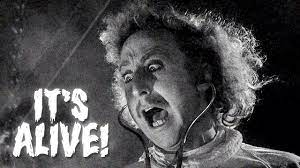

# Aplicamos la función a todos los Dataframes y los juntamos en uno

In [10]:
comprobacion.columns

Index(['Universidad', 'Ciencias Sociales y Jurídicas',
       'Ingeniería y Arquitectura', 'Artes y Humanidades',
       'Ciencias de la Salud', 'Ciencias', 'Curso', 'Tipo_centro', 'Sexo',
       'Dedicacion', 'Nivel'],
      dtype='object')

In [11]:
frankenstein = pd.DataFrame(columns= comprobacion.columns)
frankenstein

,Universidad,Ciencias Sociales y Jurídicas,Ingeniería y Arquitectura,Artes y Humanidades,Ciencias de la Salud,Ciencias,Curso,Tipo_centro,Sexo,Dedicacion,Nivel


In [12]:
for ruta in rutas_csv:
    frankenstein = frankenstein.append(pandas_clean(ruta))

In [13]:
frankenstein

,Universidad,Ciencias Sociales y Jurídicas,Ingeniería y Arquitectura,Artes y Humanidades,Ciencias de la Salud,Ciencias,Curso,Tipo_centro,Sexo,Dedicacion,Nivel
4,A Coruña,0.0,0.0,0.0,0.0,0.0,2017-2018,Centro adscrito,Hombres,Total,doctorado
5,Alcalá,0.0,0.0,0.0,0.0,0.0,2017-2018,Centro adscrito,Hombres,Total,doctorado
6,Alicante,0.0,0.0,0.0,0.0,0.0,2017-2018,Centro adscrito,Hombres,Total,doctorado
7,Almería,0.0,0.0,0.0,0.0,0.0,2017-2018,Centro adscrito,Hombres,Total,doctorado
8,Autónoma de Barcelona,0.0,0.0,0.0,0.0,0.0,2017-2018,Centro adscrito,Hombres,Total,doctorado
...,...,...,...,...,...,...,...,...,...,...,...
84,A Distancia de Madrid,0.0,0.0,0.0,0.0,0.0,2018-2019,Centro adscrito,Hombres,Tiempo Parcial,grado
85,Internacional de La Rioja,0.0,0.0,0.0,0.0,0.0,2018-2019,Centro adscrito,Hombres,Tiempo Parcial,grado
86,Internacional Isabel I de Castilla,0.0,0.0,0.0,0.0,0.0,2018-2019,Centro adscrito,Hombres,Tiempo Parcial,grado
87,Internacional Valenciana,0.0,0.0,0.0,0.0,0.0,2018-2019,Centro adscrito,Hombres,Tiempo Parcial,grado


## Limpiamos nombres de Universidad

**¿Ves algo raro en los nombres de las universidades?**

In [14]:
frankenstein.Universidad.unique()

array(['A Coruña', 'Alcalá', 'Alicante', 'Almería',
       'Autónoma de Barcelona', 'Autónoma de Madrid', 'Barcelona',
       'Burgos', 'Cádiz', 'Cantabria', 'Carlos III de Madrid',
       'Castilla-La Mancha', 'Complutense de Madrid', 'Córdoba',
       'Extremadura', 'Girona', 'Granada', 'Huelva',
       'Illes Balears (Les)', 'Jaén', 'Jaume I de Castellón', 'La Laguna',
       'La Rioja', 'Las Palmas de Gran Canaria', 'León', 'Lleida',
       'Málaga', 'Miguel Hernández de Elche', 'Murcia', 'Oviedo',
       'Pablo de Olavide', 'País Vasco/Euskal Herriko Unibertsitatea',
       'Politécnica de Cartagena', 'Politécnica de Catalunya',
       'Politécnica de Madrid', 'Politècnica de València', 'Pompeu Fabra',
       'Pública de Navarra', 'Rey Juan Carlos', 'Rovira i Virgili',
       'Salamanca', 'Santiago de Compostela', 'Sevilla',
       'València (Estudi General)', 'Valladolid', 'Vigo', 'Zaragoza',
       'Universidades Públicas No Presenciales',
       'Nacional de Educación a Distanc

In [15]:
raras = ['AutÃ³noma de Madrid', 'CÃ¡diz', 'CÃ³rdoba', 'JaÃ©n',
       'Jaume I de CastellÃ³n', 'LeÃ³n', 'MÃ¡laga',
       'Miguel HernÃ¡ndez de Elche',
       'PaÃ\xads Vasco/Euskal Herriko Unibertsitatea',
       'PolitÃ©cnica de Cartagena', 'PolitÃ©cnica de Catalunya',
       'PolitÃ©cnica de Madrid', 'PolitÃ¨cnica de ValÃ¨ncia',
       'PÃºblica de Navarra', 'ValÃ¨ncia (Estudi General)',
       'Universidades PÃºblicas No Presenciales',
       'Nacional de EducaciÃ³n a Distancia', 'AtlÃ¡ntico Medio',
       'Camilo JosÃ© Cela', 'CatÃ³lica de Valencia San Vicente MÃ¡rtir',
       'CatÃ³lica San Antonio',
       'CatÃ³lica Santa Teresa de JesÃºs de Ã\x81vila',
       'Europea del AtlÃ¡ntico', 'Loyola AndalucÃ\xada',
       'MondragÃ³n Unibertsitatea', 'RamÃ³n Llull']

In [16]:
raras_bien = ['Autónoma de Madrid', 'Cádiz', 'Córdoba', 'Jaén',
       'Jaume I de Castellón', 'León', 'Málaga',
       'Miguel Hernández de Elche',
       'País Vasco/Euskal Herriko Unibertsitatea',
       'Politécnica de Cartagena', 'Politécnica de Catalunya',
       'Politécnica de Madrid', 'Politècnica de València',
       'Pública de Navarra', 'València (Estudi General)',
       'Universidades Públicas No Presenciales',
       'Nacional de Educación a Distancia', 'Atlántico Medio',
       'Camilo José Cela', 'Católica de Valencia San Vicente Mártir',
       'Católica San Antonio',
       'Católica Santa Teresa de Jesús de Ávila',
       'Europea del Atlántico', 'Loyola Andalucía',
       'Mondragón Unibertsitatea', 'Ramón Llull']

In [17]:
dict_raro = {}
for i in range (len(raras)):
    dict_raro[f"{raras[i]}"] = f"{raras_bien[i]}"

In [18]:
dict_raro

{'AutÃ³noma de Madrid': 'Autónoma de Madrid',
 'CÃ¡diz': 'Cádiz',
 'CÃ³rdoba': 'Córdoba',
 'JaÃ©n': 'Jaén',
 'Jaume I de CastellÃ³n': 'Jaume I de Castellón',
 'LeÃ³n': 'León',
 'MÃ¡laga': 'Málaga',
 'Miguel HernÃ¡ndez de Elche': 'Miguel Hernández de Elche',
 'PaÃ\xads Vasco/Euskal Herriko Unibertsitatea': 'País Vasco/Euskal Herriko Unibertsitatea',
 'PolitÃ©cnica de Cartagena': 'Politécnica de Cartagena',
 'PolitÃ©cnica de Catalunya': 'Politécnica de Catalunya',
 'PolitÃ©cnica de Madrid': 'Politécnica de Madrid',
 'PolitÃ¨cnica de ValÃ¨ncia': 'Politècnica de València',
 'PÃºblica de Navarra': 'Pública de Navarra',
 'ValÃ¨ncia (Estudi General)': 'València (Estudi General)',
 'Universidades PÃºblicas No Presenciales': 'Universidades Públicas No Presenciales',
 'Nacional de EducaciÃ³n a Distancia': 'Nacional de Educación a Distancia',
 'AtlÃ¡ntico Medio': 'Atlántico Medio',
 'Camilo JosÃ© Cela': 'Camilo José Cela',
 'CatÃ³lica de Valencia San Vicente MÃ¡rtir': 'Católica de Valencia San Vi

In [19]:
dict_raro = {'AutÃ³noma de Madrid': 'Autónoma de Madrid',
 'CÃ¡diz': 'Cádiz',
 'CÃ³rdoba': 'Córdoba',
 'JaÃ©n': 'Jaén',
 'Jaume I de CastellÃ³n': 'Jaume I de Castellón',
 'LeÃ³n': 'León',
 'MÃ¡laga': 'Málaga',
 'Miguel HernÃ¡ndez de Elche': 'Miguel Hernández de Elche',
 'PaÃ\xads Vasco/Euskal Herriko Unibertsitatea': 'País Vasco/Euskal Herriko Unibertsitatea',
 'PolitÃ©cnica de Cartagena': 'Politécnica de Cartagena',
 'PolitÃ©cnica de Catalunya': 'Politécnica de Catalunya',
 'PolitÃ©cnica de Madrid': 'Politécnica de Madrid',
 'PolitÃ¨cnica de ValÃ¨ncia': 'Politècnica de València',
 'PÃºblica de Navarra': 'Pública de Navarra',
 'ValÃ¨ncia (Estudi General)': 'València (Estudi General)',
 'Universidades PÃºblicas No Presenciales': 'Universidades Públicas No Presenciales',
 'Nacional de EducaciÃ³n a Distancia': 'Nacional de Educación a Distancia',
 'AtlÃ¡ntico Medio': 'Atlántico Medio',
 'Camilo JosÃ© Cela': 'Camilo José Cela',
 'CatÃ³lica de Valencia San Vicente MÃ¡rtir': 'Católica de Valencia San Vicente Mártir',
 'CatÃ³lica San Antonio': 'Católica San Antonio',
 'CatÃ³lica Santa Teresa de JesÃºs de Ã\x81vila': 'Católica Santa Teresa de Jesús de Ávila',
 'Europea del AtlÃ¡ntico': 'Europea del Atlántico',
 'Loyola AndalucÃ\xada': 'Loyola Andalucía',
 'MondragÃ³n Unibertsitatea': 'Mondragón Unibertsitatea',
 'RamÃ³n Llull': 'Ramón Llull','A CoruÃ±a':'A Coruña', 'AlcalÃ¡': 'Alcalá',
       'AlmerÃ\xada':'Almería', 'AutÃ³noma de Barcelona':'Autónoma de Barcelona'}

In [20]:
frankenstein["Universidad"].replace(dict_raro, inplace=True)

In [21]:
filasno = ['Universidades Públicas No Presenciales','Universidades Públicas Especiales','Universidades Privadas',
       'Universidades Privadas Presenciales','Universidades Privadas No Presenciales']

In [23]:
for i in filasno:
    frankenstein = frankenstein.drop(frankenstein[frankenstein.Universidad == i].index)

In [24]:
# Comprobamos que ahora si que están todos los nombres bien
frankenstein["Universidad"].unique()

array(['A Coruña', 'Alcalá', 'Alicante', 'Almería',
       'Autónoma de Barcelona', 'Autónoma de Madrid', 'Barcelona',
       'Burgos', 'Cádiz', 'Cantabria', 'Carlos III de Madrid',
       'Castilla-La Mancha', 'Complutense de Madrid', 'Córdoba',
       'Extremadura', 'Girona', 'Granada', 'Huelva',
       'Illes Balears (Les)', 'Jaén', 'Jaume I de Castellón', 'La Laguna',
       'La Rioja', 'Las Palmas de Gran Canaria', 'León', 'Lleida',
       'Málaga', 'Miguel Hernández de Elche', 'Murcia', 'Oviedo',
       'Pablo de Olavide', 'País Vasco/Euskal Herriko Unibertsitatea',
       'Politécnica de Cartagena', 'Politécnica de Catalunya',
       'Politécnica de Madrid', 'Politècnica de València', 'Pompeu Fabra',
       'Pública de Navarra', 'Rey Juan Carlos', 'Rovira i Virgili',
       'Salamanca', 'Santiago de Compostela', 'Sevilla',
       'València (Estudi General)', 'Valladolid', 'Vigo', 'Zaragoza',
       'Nacional de Educación a Distancia',
       'Internacional Menéndez Pelayo', 'Aba

## Limpiamos columna Dedicación

In [26]:
frankenstein["Dedicacion"].unique()

array(['Total', 'Tiempo Completo', 'Tiempo Parcial'], dtype=object)

In [27]:
frankenstein["Dedicacion"].replace({"Total":"Tiempo Completo"}, inplace=True)

# Guardamos nuestro Frankenstein en `.csv`

In [28]:
frankenstein.to_csv("../data/frankenstein_limpio.csv",index=False)